# Imports

In [48]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [50]:
# Signal width
N = 64

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * N)

# Seed
seed = 42

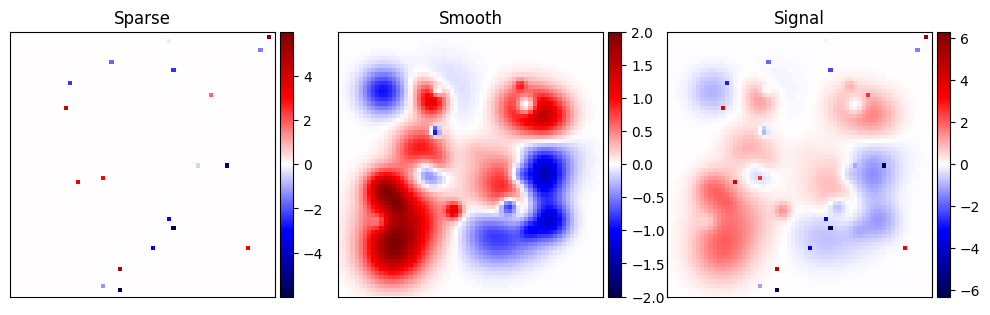

In [51]:
sparse_signal = compute_sparse(N, sparse_range, density, seed)
smooth_signal = compute_smooth(N, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal)

# Operator $\phi$

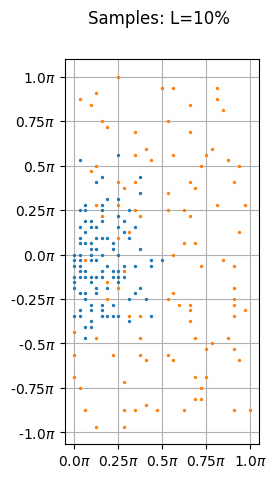

In [52]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50
y = compute_y(y0, psnr)

op.plot_samples()

# Solver

In [53]:
from pyxu.operator import Laplacian
import time

# Loss weights
lambda1 = 1e-2
lambda2 = 5e-2

### Coupled

In [54]:
coupled = True
t0 = time.time()
x1, x2 = solve(y, op, lambda1, lambda2, coupled, Laplacian((op.N,op.N)))
t1 = time.time()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyxu/abc/arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


INFO -- [2023-12-04 14:25:25.131481] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-04 14:25:33.425496] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.0007522359944643788
INFO -- [2023-12-04 14:25:42.572293] Iteration 1_000
	iteration: 1000
	N_iter: 1001.0
	RelError[x]: 0.00030451410095063065
INFO -- [2023-12-04 14:25:50.350368] Iteration 1_500
	iteration: 1500
	N_iter: 1501.0
	RelError[x]: 0.00016497620544788673
INFO -- [2023-12-04 14:25:55.511691] Iteration 1_819
	iteration: 1819
	N_iter: 1820.0
	RelError[x]: 9.997186529710661e-05
INFO -- [2023-12-04 14:25:55.512610] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x14f44dfc0>


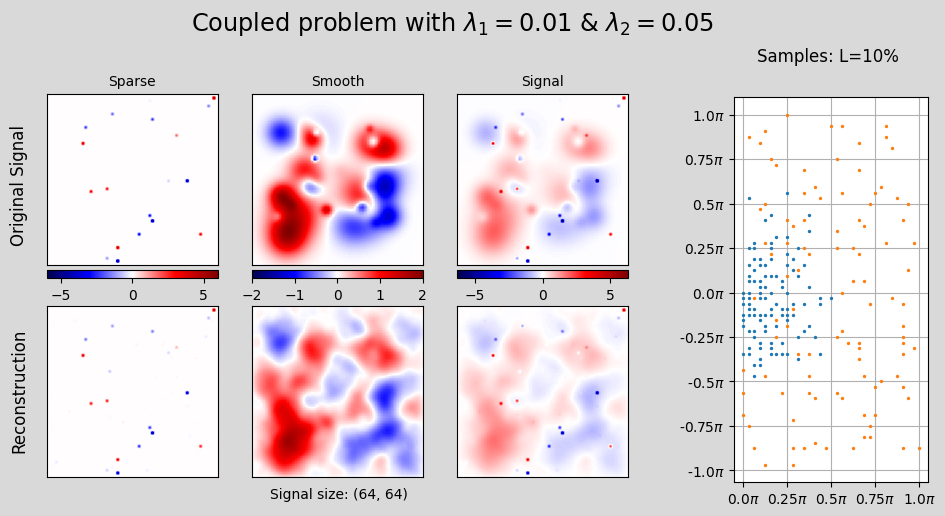

Button(description='SAVE', style=ButtonStyle())

Output()

In [55]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape((N,N)), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

### Decoupled

In [56]:
coupled = False
t0 = time.time()
x1_, x2_ = solve(y, op, lambda1, lambda2, coupled, Laplacian((op.N,op.N)))
t1 = time.time()

1701696361.1926222
check id 0.0056476593017578125
Co-Gram Identity


KeyboardInterrupt: 

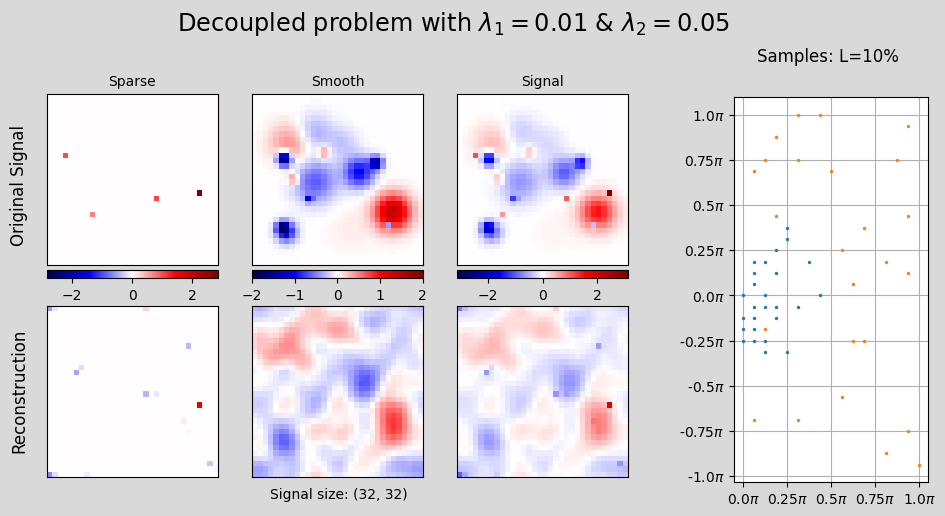

Button(description='SAVE', style=ButtonStyle())

Output()

In [ ]:
sparse_rcstr_, smooth_rcstr_, signal_rcstr_ = map(
    lambda x: x.reshape((N,N)), (x1_, x2_, x1_ + x2_)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_, smooth_rcstr_],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

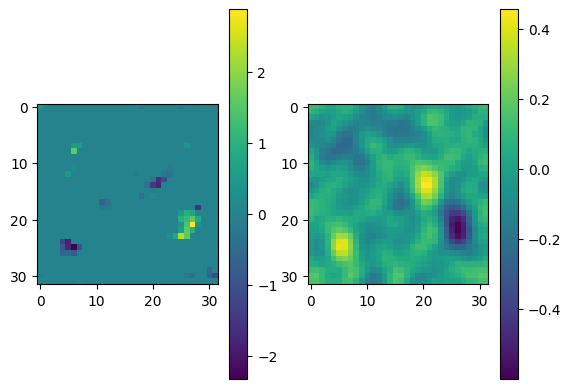

In [ ]:
plt.subplot(121)
plt.imshow(sparse_rcstr - sparse_rcstr_)
plt.colorbar()
plt.subplot(122)
plt.imshow(smooth_rcstr - smooth_rcstr_)
plt.colorbar()